# Energy Tracker testing and Development

## [energy tracker API - Swagger UI](https://energytrackerapi20211206093928.azurewebsites.net/swagger/index.html)

## Questions for Matt

- there is no data already in the database? 
    - is it possible to add the old data? 
- generally, it would be useful to add references for definitions (ideally in the schema) of terms (e.g. in `/SectorsAndTypologies/AddSectorsAndTypesToProject`): 
    - use: 
    - category: 
    - sector: 
    - type: 
    - ^ ideally the above would all have accompanying references from literature
    - (i'm currently not sure how to add Sectors / Types to my project)
- is UTC time used generally (current working assumption). required for expiry response for auth.
    - if yes, add to description in schema.
- when project is initiated with POST /Projects/Project, in the sample request: `{"yourReferenceKey": "MyKey"}`, it should be `{"referenceKey": "MyKey"}`
- ProjectCreationShell --> accessType: is there an enum of allowed values?
- "isFinalDesign" within Sessions
    - can't see how to set "isFinalDesign" (its not in the PUT or POST commands within Sessions)
    - within a Session, we should define the convention within the schema for how "isFinalDesign" can be used. suggest that:
        - for a given "methodology", there can only be 1no "isFinalDesign" 
        - can this be enforced by validation within the schema? 



\newpage

## Workflow of Tool 

- JG is in the process of making a tool for extracting data from an IES model and inputting into EnergyTracker
- it is intentionally limited in scope as a way to: 
    - experiment with the API on a small project
    - embed the eTracker into other best-practice modelling workflows to increase likelihood of Engineers inputting the data

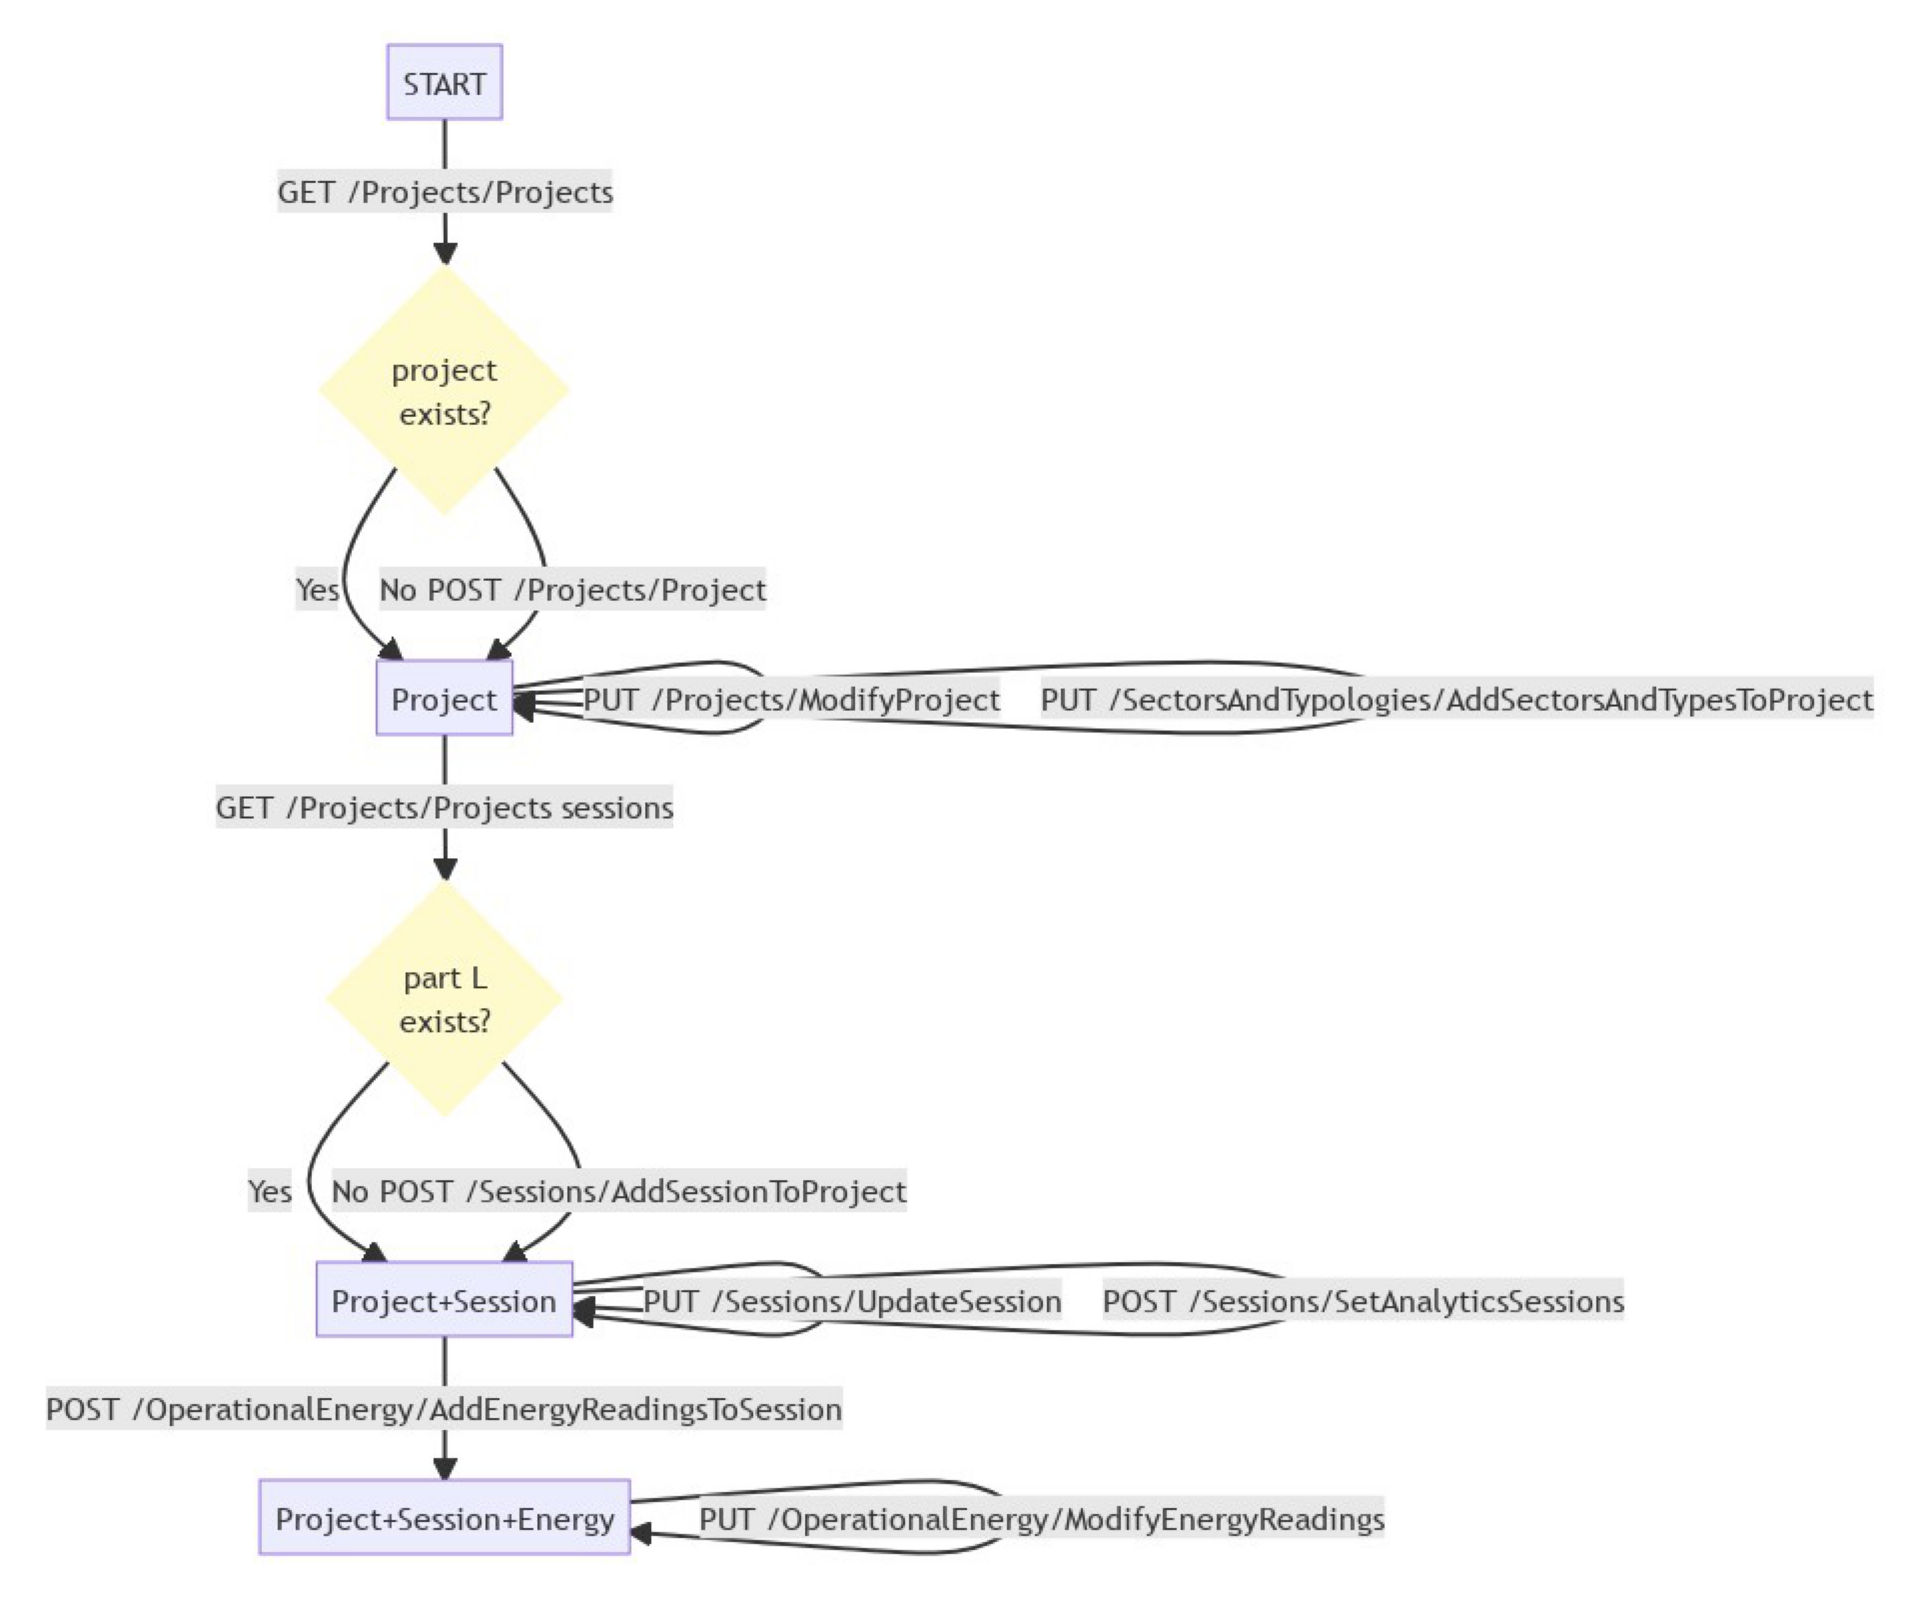

In [1]:
import base64
from IPython.display import Image, display,  Markdown
import requests, io
import PIL 
import matplotlib.pyplot as plt

def mm_old(graph):
    """plot mermaid diagram in notebook"""
    graphbytes = graph.encode("ascii")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))


def mm(graph, fnm='mm.png'):
    graphbytes = graph.encode("ascii")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    fig = plt.figure(dpi=300, figsize=[8,8])
    ax = fig.add_subplot()
    img = PIL.Image.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
    ax.imshow(img)
    ax.axis('off')
    #fig.savefig(fnm)
    
mm("""
flowchart TB
    START --> |GET /Projects/Projects| Q{project<br>exists?}
    Q -- Yes --> Project
    Q -- No POST /Projects/Project --> Project
    Project-->|"PUT /Projects/ModifyProject"|Project
    Project-->|"PUT /SectorsAndTypologies/AddSectorsAndTypesToProject"|Project
    Project -- GET /Projects/Projects sessions --> Q1{part L<br>exists?}
    Q1 -- Yes --> Project+Session
    Q1 -- No POST /Sessions/AddSessionToProject --> Project+Session
    Project+Session-->|"PUT /Sessions/UpdateSession"|Project+Session
    Project+Session-->|"POST /Sessions/SetAnalyticsSessions"|Project+Session
    Project+Session-->|"POST /OperationalEnergy/AddEnergyReadingsToSession"|Project+Session+Energy
    Project+Session+Energy-->|"PUT /OperationalEnergy/ModifyEnergyReadings"|Project+Session+Energy
    style Q fill:lemonchiffon,stroke-width:0px
    style Q1 fill:lemonchiffon,stroke-width:0px
""")

## Other Notes

- because the swagger.json file is built to the openapi standard it has been possible to convert the swagger.json files into python [pydantic](https://pydantic-docs.helpmanual.io/) models [datamodel-code-generator](https://koxudaxi.github.io/datamodel-code-generator/)
    - this makes development using python much more streamlined! 
- [vuetify-jsonschema-form](https://github.com/koumoul-dev/vuetify-jsonschema-form) can be used to generate out-the-box UI forms from the schema